# SY06 - TP1 : Introduction au traitement du signal

## 1. Analyse des données

In [1]:
import numpy as np
import plotly.graph_objects as go
x = np.loadtxt('AC05_SY06_TP1.csv')

# Définir le vecteur temps
# Fréquence d'échantillonnage en Hz
fe = 12000 
# Créer un vecteur de zeros pour le nombre de points
N = x.shape[0] 
# Vecteur temps
t = np.arange(N) / fe  

#figure pour les 6 premiers jours
fig = go.Figure()
fig.update_layout(title="Représentation temporelle du signal accélérométrique sur les 6 premiers jours")
fig.update_xaxes(title_text="Temps (s)")
fig.update_yaxes(title_text="Amplitude (mV)")

for i in range(0,6):
    fig.add_trace(go.Scatter(x=t, y=x[:,i], name=f"Jour {i+1}"))
    
fig.show()

#figure pour les 6 jours suivants
fig2 = go.Figure()
fig2.update_layout(title="Représentation temporelle du signal accélérométrique sur les 6 derniers jours")
fig2.update_xaxes(title_text="Temps (s)")
fig2.update_yaxes(title_text="Amplitude (mV)")

for i in range(6, 12):
    fig2.add_trace(go.Scatter(x=t, y=x[:, i], name=f"Jour {i+1}"))

fig2.show()

### LE TYPE DES SIGNAUX

**1.** Continu : Les vibrations étant mesurées en continu tout au long du test, le signal est par nature continu.

**2.** Mixtes : ils ont une composante déterministe et une composante aléatoire.

**3.** Le signal déterministe est periodique-composite et l'aléatoire est Stationnaire (la caractéristique statique ne varie pas significativement au cours du temps).



### LES DEUX CYCLES:
Les vibrations d’un réducteur d’engrenages ont 2 cycles :
1. Le cycle correspondant à un tour complet de l’engrenage : Ce cycle est plus long (cf. figure 1). On observe bien forme générale de l'onde, qui montre une variation globale de l'amplitude sur une période plus longue.
La perdiode de ce cycle semble avoire une moyenne de TMoyenne1 = 0.025s
3. Le cycle du passage d’une dent a une autre : Ce cycle est beaucoup plus court (cf. Figure 2). La période de ce cycle semble avoir une moyenne de TMoyenne2= 0.0005s

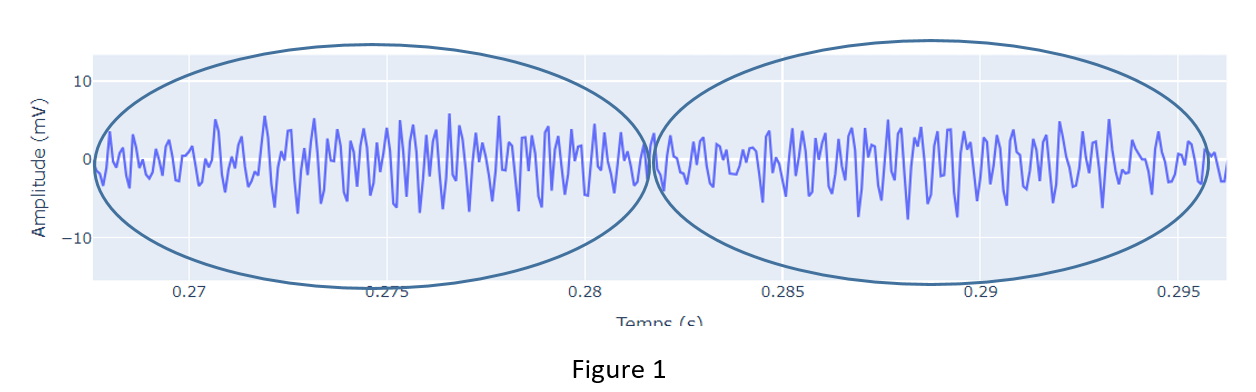

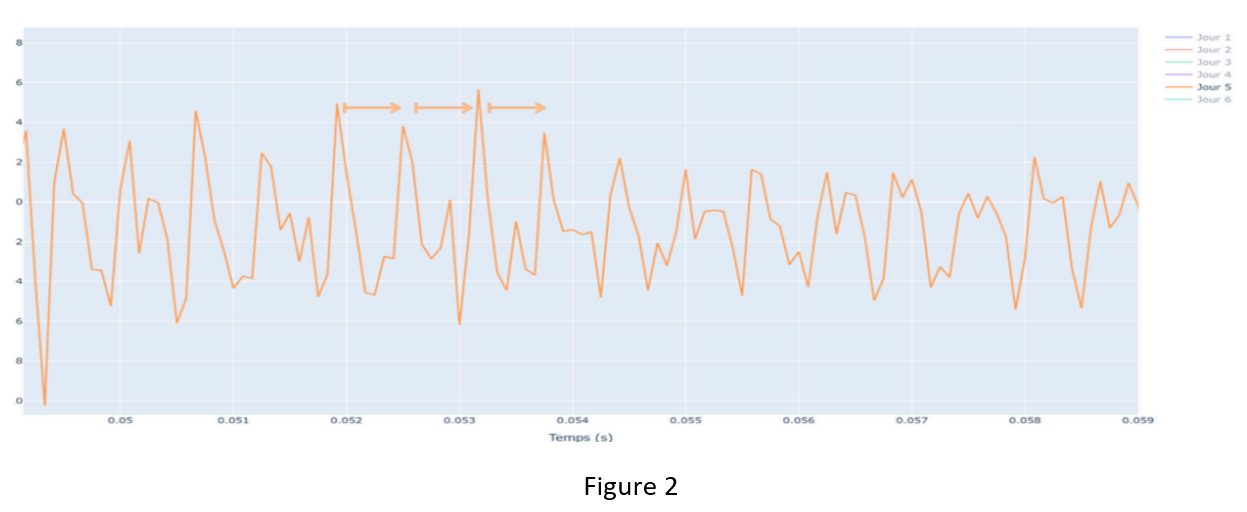

## 2. Choix de l’indicateur pour la détection de defauts

In [2]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import kurtosis
x = np.loadtxt('AC05_SY06_TP1.csv')     

# Définir la fonction pour calculer la moyenne, l'écart-type et le kurtosis
def indicateurs(e):
    m = np.mean(e)
    s = np.sqrt(np.var(e))
    k = kurtosis(e)
    return m, s, k

# Inistialisation des tableau pour  les 12 jours
m_valeurs = np.zeros(12)
s_valeurs = np.zeros(12)
k_valeurs= np.zeros(12)


for i in range(12):
    m_valeurs[i],s_valeurs[i],k_valeurs[i]= indicateurs(x[:, i])

#figure de la  Moyenne
fig_moyenne = go.Figure()
fig_moyenne.update_layout(title="Évolution de la moyenne en fonction des jours")
fig_moyenne.update_xaxes(title_text="Temps en Jour")
fig_moyenne.update_yaxes(title_text="Moyenne")
fig_moyenne.add_trace(go.Scatter(x=list(range(1, 13)), y=m_valeurs, mode='lines+markers', name="Moyenne"))
fig_moyenne.show()

# #figure de l'Écart-type
fig_s = go.Figure()
fig_s.update_layout(title="Évolution de l'écart-type en fonction des jours",)
fig_s.update_xaxes(title_text="Temps en Jour")
fig_s.update_yaxes(title_text="Écart-type (mV)")
fig_s.add_trace(go.Scatter(x=list(range(1, 13)), y=s_valeurs, mode='lines+markers', name="Écart-type"))
fig_s.show()

# #figure du Kurtosis
fig_k = go.Figure()
fig_k.update_layout(title="Évolution du kurtosis  en fonction des jours")
fig_k.update_xaxes(title_text="Temps en Jour")
fig_k.update_yaxes(title_text="Kurtosis")
fig_k.add_trace(go.Scatter(x=list(range(1, 13)), y=k_valeurs, mode='lines+markers', name="Kurtosis"))
fig_k.show()

### Quel est l’indicateur qui permet de mieux détecter l’apparition du défaut ?
Le kurtosis permet de clairement détecter l'apparition de défaut au vu du graphique. Cela s'explique, car le kurtosis est sensible aux valeurs extrêmes.

### Pour quelle raison la moyenne m ne contient-elle pas d’information dans cette étude de cas 
Dans cette étude, la moyenne n'apporte pas d'information pertinente, car l'amplitude du signal représentant un défaut est à la fois positive et négative, avec des valeurs similaires. Par conséquent, le calcul de la moyenne s'équilibre en une valeur proche de zéro.

### Expliquer alors la raison des petites fluctuations observées sur les indicateurs m, s et k lors des 10 premiers jours ?
Les indicateurs des jours 1 à 10 représentent le résultat du calcul des paramètres d'une expérience aléatoire répétée 10 fois. Il est donc tout à fait normal, en raison du caractère expérimental du test, d'observer de légères variations. De plus, cela s'explique par la nature des signaux, comme mentionné en Partie 1. En effet, ces signaux sont composites et contiennent une composante aléatoire, ce qui crée forcément des variations (légères, car il s'agit de signaux aléatoires stationnaires) dans les calculs des indicateurs.

## 3. Etude de la convergence de l’indicateur choisi

In [3]:

# Étude de la convergence du kurtosis en fonction du nombre de points d'acquisition
nbr_pts = np.arange(100, x.shape[0], 100)
kurtosis_convergence = np.zeros((len(nbr_pts), 12))

# Calcul du kurtosis 
for j in range(12):
    for i, n in enumerate(nbr_pts):
        kurtosis_convergence[i, j] = kurtosis(x[:n, j])

figure = go.Figure()

for j in range(12):
    figure.add_trace(go.Scatter(x=nbr_pts, y=kurtosis_convergence[:, j], mode='lines+markers', name=f'Jour {j+1}'))

figure.update_layout(
    title="Convergence du kurtosis en fonction du nombre de points d'acquisition",
    xaxis_title="Nombre de points d'acquisition",
    yaxis_title="Kurtosis",
    legend_title="Jours",
    template="plotly_white"
)

figure.show()


Les courbes de kurtosis des essais contenant le défaut convergent vers une valeur commune, plus le nombre de points augmente. Pour répondre aux besoins temps réels d'économie des ressources de calculs, on peut dire (d'après le graphique) que les courbent deviennent stables à partir de 200 points  acquisitions.
